In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

In [ ]:
model = ResNet50(weights="imagenet")

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
def classify(img):
    x = cv2.resize(img, (224, 224))
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    x = img_to_array(x)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x, verbose=0)
    return decode_predictions(preds, top=1)[0][0]   # (class_id, class_name, confidence)


In [ ]:
img = cv2.imread("zebra.jpg")
img_modified = img.copy()

In [ ]:
img_modified[50, 50] = [0, 255, 0]

In [ ]:
edges_original = cv2.Canny(img, 100, 200)
edges_modified = cv2.Canny(img_modified, 100, 200)

In [ ]:
cls1 = classify(img)
cls2 = classify(img_modified)

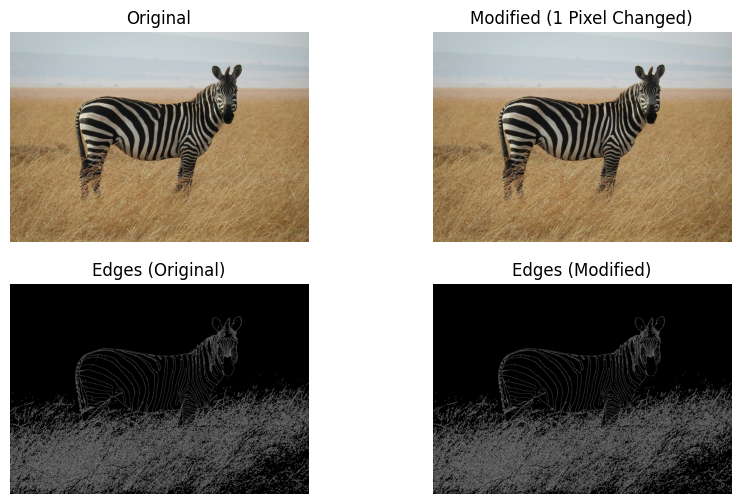

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(221); plt.title("Original"); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis("off")
plt.subplot(222); plt.title("Modified (1 Pixel Changed)"); plt.imshow(cv2.cvtColor(img_modified, cv2.COLOR_BGR2RGB)); plt.axis("off")

plt.subplot(223); plt.title("Edges (Original)"); plt.imshow(edges_original, cmap="gray"); plt.axis("off")
plt.subplot(224); plt.title("Edges (Modified)"); plt.imshow(edges_modified, cmap="gray"); plt.axis("off")

plt.show()